<a href="https://colab.research.google.com/github/Frkntf/DATA4auditors_IAEMetz/blob/main/Python_IAE_METZ_Intermediaire0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TD IAE Metz niveau intermédiaire

Nous allons voir ensemble:
1) l'importation de packages

2) l'importation de données

3) leurs analyse

In [ ]:
# BLOCK : IMPORT
import pandas as pd #package pour manipuler des dataframes
import matplotlib.pyplot as plt #package pour les graphes
import seaborn as sns # package pour les visualisations

In [ ]:
#Nous souhaitons télécharger des données
url = "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
#On analyse
display(df.head())

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


In [ ]:
# On nettoie
df.dropna(inplace=True)

In [ ]:
#Creation d'une fonction

def calculer_ratios(df):
  """ On va calculer les principaux ratios financiers """
  df['Marge brute'] = (df['AAPL.High']-df['AAPL.Low'])/df['AAPL.Open']
  df['Variation journaliere'] = df['AAPL.Close'].pct_change()
  return df

In [ ]:
df = calculer_ratios(df)
df

In [ ]:
#df[['AAPL.High', 'AAPL.Low']]
display(df[['Marge brute','Variation journaliere']].describe())

,Marge brute,Variation journaliere
count,506.000000,505.000000
mean,0.017701,0.000230
std,0.011481,0.015294
min,0.005019,-0.065707
25%,0.010957,-0.006607
50%,0.015517,0.000000
75%,0.021255,0.008281
max,0.177084,0.064963


<function matplotlib.pyplot.show(close=None, block=None)>

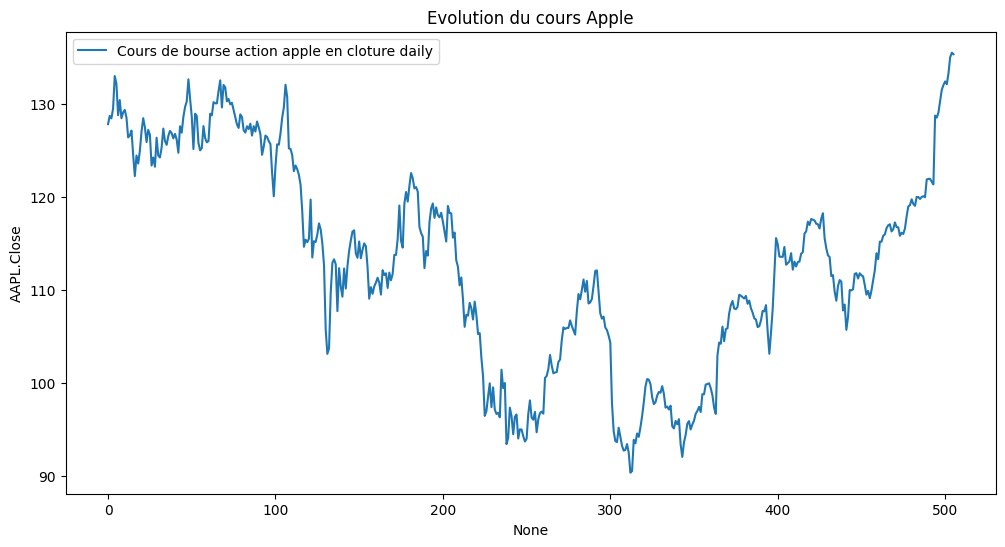

In [ ]:
plt.figure(figsize=(12,6)) #la taille du cadre, nb de pixels
sns.lineplot(data=df, x=df.index, y='AAPL.Close', label='Cours de bourse action apple en cloture daily')
plt.title('Evolution du cours Apple')
plt.legend()
plt.show

<Axes: >

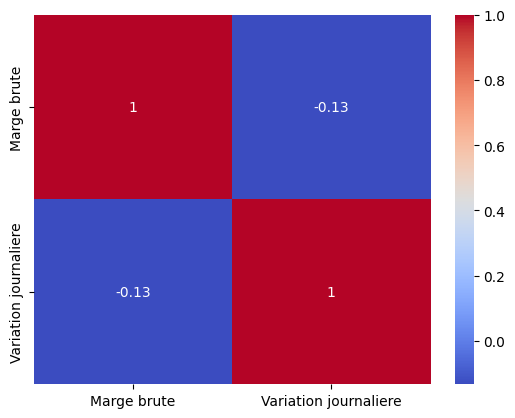

In [ ]:
#Heatmap des corrélations
plt.figure()
sns.heatmap(df[['Marge brute','Variation journaliere']].corr(), annot=True, cmap='coolwarm')

In [ ]:
#on va prendre " actions" APPLE,META,MICROSOFT
#BLOCK : IMPORTATION DES PACKAGES
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
# dans les packages "outils" vous pouvez SOUS SELECTIONNER LE CHAPITRE

#BLOCK : VARIABLES
#pour une comparaison d'indices selon les pays
apple_symbol = 'EWQ' #iShares MSCI France ETF
meta_symbol = 'EWK' #iShares MSCI Ireland ETF
msft_symbol = 'SPY' #S&P 500 son ETF


#BLOCK : TIME FRAME
start_date = '2010-01-01'
end_date = '2025-01-01'
#Telechargement des données historiques de YFINANCE pour chaque pays
AAPL_data = yf.download(apple_symbol, start=start_date, end=end_date)
META_data = yf.download(ireland_symbol, start=start_date, end=end_date)
MSFT_data = yf.download(luxembourg_symbol, start=start_date, end=end_date)

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


Colonnes des actions: Index(['AAPL', 'META', 'MSFT'], dtype='object', name='Ticker')
Colonnes du benchmark: Index(['SPY'], dtype='object', name='Ticker')

Analyse des actions par rapport au benchmark SPY

AAPL:
  Rendement annuel   = 31.92%
  Volatilité annuelle = 30.66%
  Beta              = 1.20
  Alpha annualisé   = 13.87%
  Ratio de Sharpe   = 0.98

MSFT:
  Rendement annuel   = 25.38%
  Volatilité annuelle = 29.08%
  Beta              = 1.19
  Alpha annualisé   = 7.44%
  Ratio de Sharpe   = 0.80

META:
  Rendement annuel   = 30.21%
  Volatilité annuelle = 42.38%
  Beta              = 1.32
  Alpha annualisé   = 10.36%
  Ratio de Sharpe   = 0.67



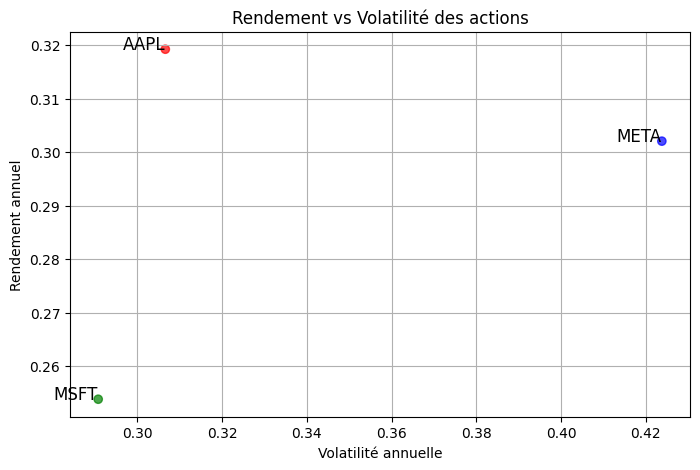

         Return  Volatility      Beta     Alpha  Sharpe Ratio
Stock                                                        
AAPL   0.319224    0.306590  1.198666  0.138738      0.975976
MSFT   0.253844    0.290751  1.191686  0.074409      0.804276
META   0.302052    0.423780  1.317719  0.103640      0.665563


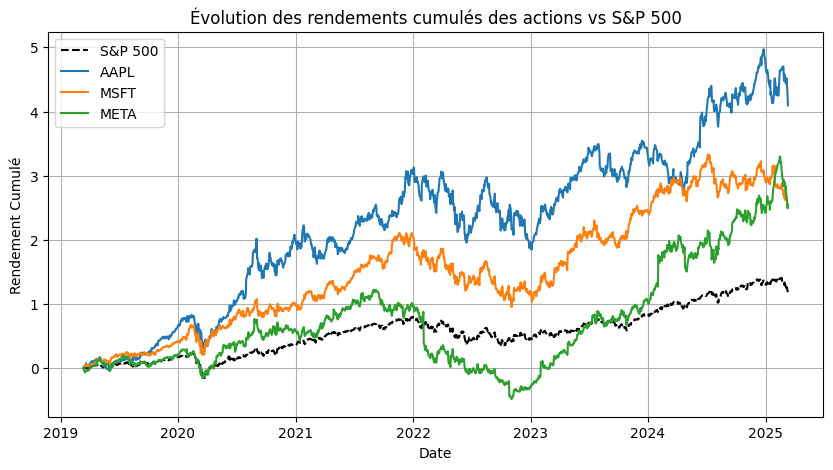

<Figure size 1200x600 with 0 Axes>

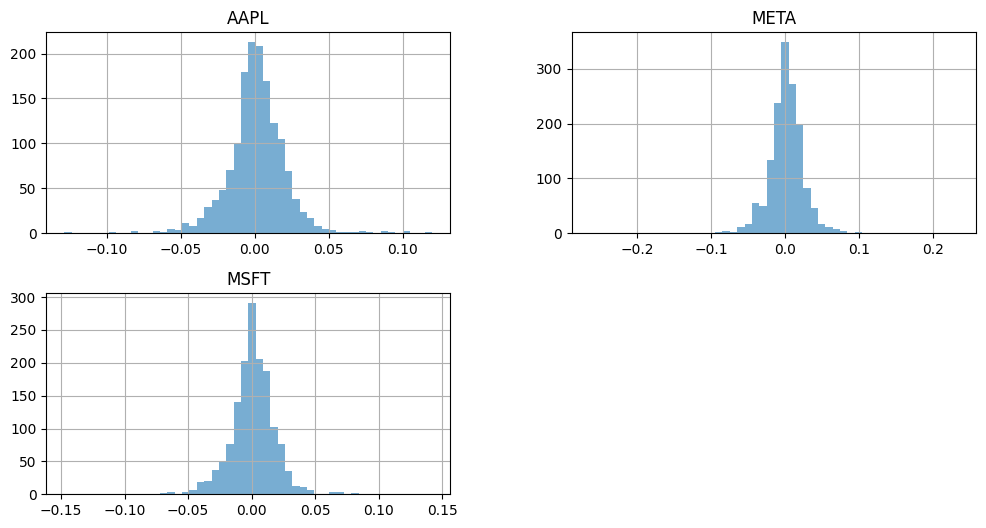

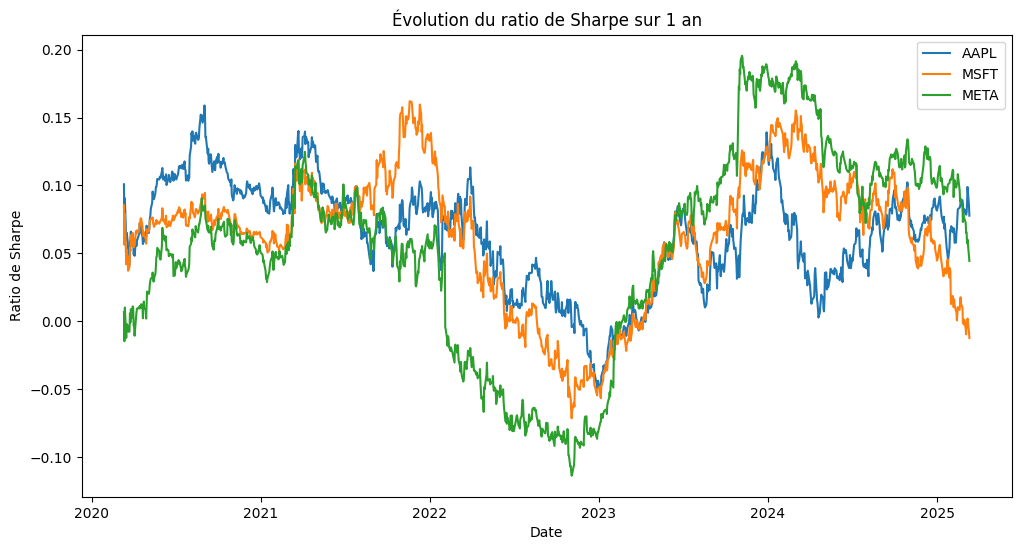

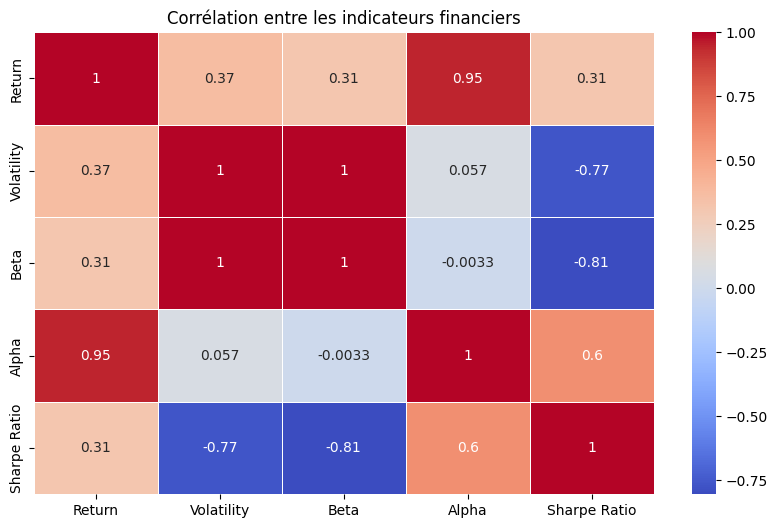

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Définir les tickers des actions et du benchmark
tickers = ["AAPL", "MSFT", "META"]
benchmark_ticker = "SPY" #SPDR S&P 500 ETF Trust

# Définir la période d'analyse
start_date = "2019-03-12"
end_date   = "2025-03-12"

# Télécharger les données
data = yf.download(tickers, start=start_date, end=end_date)
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)

# Sélectionner uniquement les prix de clôture avec xs() pour éviter le MultiIndex
data = data.xs("Close", level="Price", axis=1)
benchmark_data = benchmark_data.xs("Close", level="Price", axis=1)

# Vérifier l'affichage après correction
print("Colonnes des actions:", data.columns)
print("Colonnes du benchmark:", benchmark_data.columns)

# Calculer les rendements journaliers pour les actions et le benchmark
returns = data.pct_change().dropna()
benchmark_returns = benchmark_data.pct_change().dropna()

# Aligner les indices pour s'assurer d'utiliser les mêmes dates
returns = returns.loc[benchmark_returns.index]

# Calcul des rendements moyens annualisés et de la volatilité annualisée
mean_returns = returns.mean() * 252       # Rendement annualisé
volatility   = returns.std() * np.sqrt(252) # Volatilité annualisée

# Taux sans risque annuel (exemple : 1%)
risk_free_rate = 0.02

print("\nAnalyse des actions par rapport au benchmark SPY\n")

# Initialiser performance_table avant la boucle
performance_table = []


for stock in tickers:
    # Vérification des données pour éviter les erreurs
    if stock not in returns.columns:
        print(f"⚠️ Données indisponibles pour {stock}")
        continue

    # Conversion des séries pandas en tableaux numpy pour éviter les erreurs de dimensions
    x = benchmark_returns.values.flatten()  # Benchmark SPY
    y = returns[stock].values.flatten()  # Action spécifique

    # Calcul de beta et de l'alpha journalier via une régression linéaire
    beta, daily_alpha = np.polyfit(x, y, 1)
    annual_alpha = daily_alpha * 252  # Annualisation de l'alpha

    # Calcul du ratio de Sharpe
    sharpe_ratio = (mean_returns[stock] - risk_free_rate) / volatility[stock]

    print(f"{stock}:")
    print(f"  Rendement annuel   = {mean_returns[stock]:.2%}")
    print(f"  Volatilité annuelle = {volatility[stock]:.2%}")
    print(f"  Beta              = {beta:.2f}")
    print(f"  Alpha annualisé   = {annual_alpha:.2%}")
    print(f"  Ratio de Sharpe   = {sharpe_ratio:.2f}\n")

      # Ajouter les résultats dans le tableau après les calculs pour chaque stock
    performance_table.append([stock, mean_returns[stock], volatility[stock], beta, annual_alpha, sharpe_ratio])


# Tracé du rendement vs volatilité pour visualiser la performance
plt.figure(figsize=(8, 5))
colors = {"AAPL": "red", "MSFT": "blue", "META": "green"}
plt.scatter(volatility, mean_returns, color=[colors[t] for t in tickers if t in returns.columns], alpha=0.7)

# Annotation des points
for stock in tickers:
    if stock in returns.columns:
        plt.text(volatility[stock], mean_returns[stock], stock, fontsize=12, ha='right')

plt.xlabel("Volatilité annuelle")
plt.ylabel("Rendement annuel")
plt.title("Rendement vs Volatilité des actions")
plt.grid(True)
plt.show()



# Création du DataFrame de performance
performance_df = pd.DataFrame(performance_table, columns=["Stock", "Return", "Volatility", "Beta", "Alpha", "Sharpe Ratio"])
performance_df.set_index("Stock", inplace=True)

# Affichage du tableau de performances
print(performance_df)


# Rendements cumulés
cumulative_returns = (1 + returns).cumprod() - 1
cumulative_benchmark = (1 + benchmark_returns).cumprod() - 1


# Affichage des courbes de rendement cumulé
plt.figure(figsize=(10, 5))
plt.plot(cumulative_benchmark, label="S&P 500", linestyle="dashed", color="black")
for stock in tickers:
    if stock in cumulative_returns.columns:
        plt.plot(cumulative_returns[stock], label=stock)

plt.xlabel("Date")
plt.ylabel("Rendement Cumulé")
plt.title("Évolution des rendements cumulés des actions vs S&P 500")
plt.legend()
plt.grid(True)
plt.show()

# Histogramme des rendements quotidiens
plt.figure(figsize=(12,6))
returns.hist(bins=50, alpha=0.6, figsize=(12,6))
plt.title("Distribution des rendements quotidiens")
plt.show()

# Rolling Sharpe Ratio
rolling_sharpe = returns.rolling(window=252).mean() / returns.rolling(window=252).std()
plt.figure(figsize=(12, 6))
for stock in tickers:
    if stock in rolling_sharpe.columns:
        plt.plot(rolling_sharpe[stock], label=stock)  # Correction d'indentation

plt.xlabel("Date")
plt.ylabel("Ratio de Sharpe")
plt.title("Évolution du ratio de Sharpe sur 1 an")
plt.legend()
plt.show()

# Heatmap des corrélations entre ratios financiers ++++
plt.figure(figsize=(10, 6))
sns.heatmap(performance_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Corrélation entre les indicateurs financiers")
plt.show()
